In [76]:
.libPaths("/home/senyaaa/BI-PRS/packages")
#.libPaths("/home/kostyadovnar/CVUT/BI-PRS/packages")
#.libPaths("/home/senyaaa/BI-PRS/packages") # change to ur folder

library(dplyr) # download too
library(eurostat)
library(ggplot2)
library(gridExtra) # download too
library(cowplot)
library(e1071)

In [25]:
surname <- "pogodin"
L <- nchar(surname)
K <- 4
M <- ((K + L) * 47) %% 11 + 1
print(M)

[1] 1


In [26]:
# get id for dataset
srch <- search_eurostat(pattern='Police-recorded offences by NUTS 3 regions')
srch

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values,hierarchy
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4
Police-recorded offences by NUTS 3 regions,crim_gen_reg,dataset,05.12.2023,05.12.2023,2008,2021,216947,4


In [3]:
nuts3_cz <- c(
  "CZ010", "CZ020", "CZ031", "CZ032", "CZ041",
  "CZ042", "CZ051", "CZ052", "CZ053", "CZ063",
  "CZ064", "CZ071", "CZ072", "CZ080"
)

In [4]:
# Download data
data <- get_eurostat(id = "crim_gen_reg")

# choose only required data and remove unneccesary columns
data$TIME_PERIOD <- as.Date(data$TIME_PERIOD)
czech_data <- data %>%
  filter(geo %in% nuts3_cz, TIME_PERIOD == "2021-01-01")
czech_data$freq <- NULL
czech_data <- czech_data[czech_data$unit != "P_HTHAB", ]
czech_data$unit <- NULL
czech_data$TIME_PERIOD <- NULL

head(czech_data)
tail(czech_data)

Table crim_gen_reg cached at /tmp/RtmpziSImd/eurostat/5dbb8eb502ceb230f603aca463f247ce.rds



iccs,geo,values
<chr>,<chr>,<dbl>
ICCS0101,CZ010,7
ICCS0101,CZ020,1
ICCS0101,CZ031,7
ICCS0101,CZ032,2
ICCS0101,CZ041,3
ICCS0101,CZ042,5


iccs,geo,values
<chr>,<chr>,<dbl>
ICCS050211,CZ053,59
ICCS050211,CZ063,51
ICCS050211,CZ064,234
ICCS050211,CZ071,86
ICCS050211,CZ072,57
ICCS050211,CZ080,226


In [5]:
iccs_mapping <- c(
  "ICCS0101" = "Intentional homicide",
  "ICCS02011" = "Assault",
  "ICCS0401" = "Robbery",
  "ICCS0501" = "Burglary",
  "ICCS05012" = "Burglary of private residential premises",
  "ICCS0502" = "Theft",
  "ICCS050211" = "Theft of a motorized land vehicle"
)
nuts3_mapping <- c(
  "CZ010" = "Hlavní město Praha",
  "CZ020" = "Středočeský kraj",
  "CZ031" = "Jihočeský kraj",
  "CZ032" = "Plzeňský kraj",
  "CZ041" = "Karlovarský kraj",
  "CZ042" = "Ústecký kraj",
  "CZ051" = "Liberecký kraj",
  "CZ052" = "Královéhradecký kraj",
  "CZ053" = "Pardubický kraj",
  "CZ063" = "Kraj Vysočina",
  "CZ064" = "Jihomoravský kraj",
  "CZ071" = "Olomoucký kraj",
  "CZ072" = "Zlínský kraj",
  "CZ080" = "Moravskoslezský kraj"
)
# rename for better vizualization
czech_data <- czech_data %>%
  mutate(iccs = iccs_mapping[iccs])
czech_data$geo <- nuts3_mapping[czech_data$geo]

# Základní popis
Zkoumaná data jsou tabulka, která obsahuje tři sloupce: "iccs" (typ trestného činu), "geo" (NUTS 3 region) a "values" (počet trestných činů). Data zahrnují různé typy trestných činů v jednotlivých regionech České republiky.


In [6]:
czech_data

iccs,geo,values
<chr>,<chr>,<dbl>
Intentional homicide,Hlavní město Praha,7
Intentional homicide,Středočeský kraj,1
Intentional homicide,Jihočeský kraj,7
Intentional homicide,Plzeňský kraj,2
Intentional homicide,Karlovarský kraj,3
Intentional homicide,Ústecký kraj,5
Intentional homicide,Liberecký kraj,3
Intentional homicide,Královéhradecký kraj,1
Intentional homicide,Pardubický kraj,0


In [79]:
total_crimes <- sum(crime_sums_df$count)
print(total_crimes)

[1] 70337


In [7]:
# split into separate nuts3 tables
region_tables <- split(czech_data, czech_data$geo)

In [78]:
crime_stats <- czech_data %>%
  group_by(iccs) %>%
  summarise(min = min(values),
            q1 = quantile(values, 0.25),
            median = median(values),
            mean = mean(values),
            q3 = quantile(values, 0.75),
            max = max(values),
            skewness = skewness(values),
            kurtosis = kurtosis(values))
crime_stats

iccs,min,q1,median,mean,q3,max,skewness,kurtosis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Assault,120,195.00,257.0,306.428571,384.50,637,0.6640972,-0.9112729
Burglary,447,602.25,934.5,2196.285714,3105.25,9937,1.8923045,3.0513241
Burglary of private residential premises,95,146.75,211.0,372.928571,455.25,1138,1.2833554,0.2435739
Intentional homicide,0,2.00,3.0,3.285714,4.75,7,0.3979362,-1.2116061
Robbery,24,38.75,58.5,87.857143,146.75,203,0.6477218,-1.3885838
Theft,499,652.25,1116.0,1899.214286,2563.75,7861,1.9062766,3.1012387
Theft of a motorized land vehicle,51,65.75,118.0,158.071429,225.00,411,0.8953203,-0.5125160


Všechny trestné činy vykazují pozitivní skewness, což naznačuje, že distribuce je více nakloněna doprava.
Hodnoty koeficientu kurtosis jsou většinou pozitivní. Distribuce mají vyšší špičku v porovnání s normálním rozdělením.

In [8]:
# predefine table
stats_table <- data.frame(
  Region = character(), 
  Min = numeric(),  
  Min_Crime = character(),
  Max = numeric(),  
  Max_Crime = character(),    
  Mean = numeric(), 
  Median = numeric(), 
  stringsAsFactors = FALSE
)

# calculate basic statistic for each nuts3 region
for (region in names(region_tables)) {
  region_data <- region_tables[[region]]

  min_crime <- region_data[which.min(region_data$values), "iccs"]
  max_crime <- region_data[which.max(region_data$values), "iccs"]  

  min_crime <- as.character(min_crime)
  max_crime <- as.character(max_crime)  
    
  summary_stats <- region_data %>%
    summarise(
      Min = min(values),
      Max = max(values),  
      Mean = mean(values),
      Median = median(values),
    )
  
  summary_stats$Region <- region
  summary_stats$Min_Crime <- min_crime
  summary_stats$Max_Crime <- max_crime
  
  # add row
  stats_table <- bind_rows(stats_table, summary_stats)
}

print(stats_table)

                 Region Min            Min_Crime  Max Max_Crime      Mean
1    Hlavní město Praha   7 Intentional homicide 9937  Burglary 2863.0000
2        Jihočeský kraj   7 Intentional homicide 1044     Theft  374.0000
3     Jihomoravský kraj   6 Intentional homicide 3296  Burglary 1043.4286
4      Karlovarský kraj   3 Intentional homicide  633     Theft  229.8571
5         Kraj Vysočina   3 Intentional homicide  508  Burglary  208.5714
6  Královéhradecký kraj   1 Intentional homicide  677     Theft  241.7143
7        Liberecký kraj   3 Intentional homicide  938  Burglary  352.2857
8  Moravskoslezský kraj   4 Intentional homicide 3686  Burglary 1252.0000
9        Olomoucký kraj   2 Intentional homicide 1188     Theft  388.0000
10      Pardubický kraj   0 Intentional homicide  644     Theft  218.4286
11        Plzeňský kraj   2 Intentional homicide 1775  Burglary  549.8571
12     Středočeský kraj   1 Intentional homicide 4006  Burglary 1245.8571
13         Ústecký kraj   5 Intentiona

### Zajímavosti

 * **Praha versus regiony**: Hlavní město Praha vykazuje výrazně vyšší počet trestných činů než většina ostatních regionů. To může být způsobeno vysokou hustotou obyvatelstva a vyšší mírou urbanizace, což vede ke zvýšené kriminalitě v oblastech s větší populací a ekonomickou aktivitou.
 * **Jihomoravský kraj** a **Moravskoslezský** mají také vysoký průměrný počet trestných činů (Mean = 1043, Mean = 1252), což může být důsledkem jeho rozsáhlého průmyslového a obchodního sektoru.
 * Naopak **Pardubický kraj** má nejnižší průměrný počet trestných činů (Mean = 218), což může naznačovat relativně nižší úroveň kriminality v tomto regionu. Jeden z možných důvodu je např. vyšší míra sociální stability a silnější komunitní vazby
 * Minimální hodnoty:
     1. Intentional homicide: nízký počet úmyslných vražd, může to být výsledek několika faktorů jako jsou silné sociální normy proti násilí a vraždám,tyto trestné činy méně tolerovány což je logický. Regiony může mít účinné bezpečnostní opatření, jako je vysoká přítomnost policie, moderní technologie sledování a prevence kriminality
 * Maximální hodnoty:
     1. Theft, burglary: jednoduchost spáchání vloupání a krádeží a riziko, že pachatelé nebudou chyceni, může být jedním z faktorů, které přispívají k vysokým počtům těchto trestných činů. Možnost rychle získat cenný majetek nebo peníze může také motivaci

#### Pár základních grafů s průměrnými počty trestných činů v jednotlivých regionech.

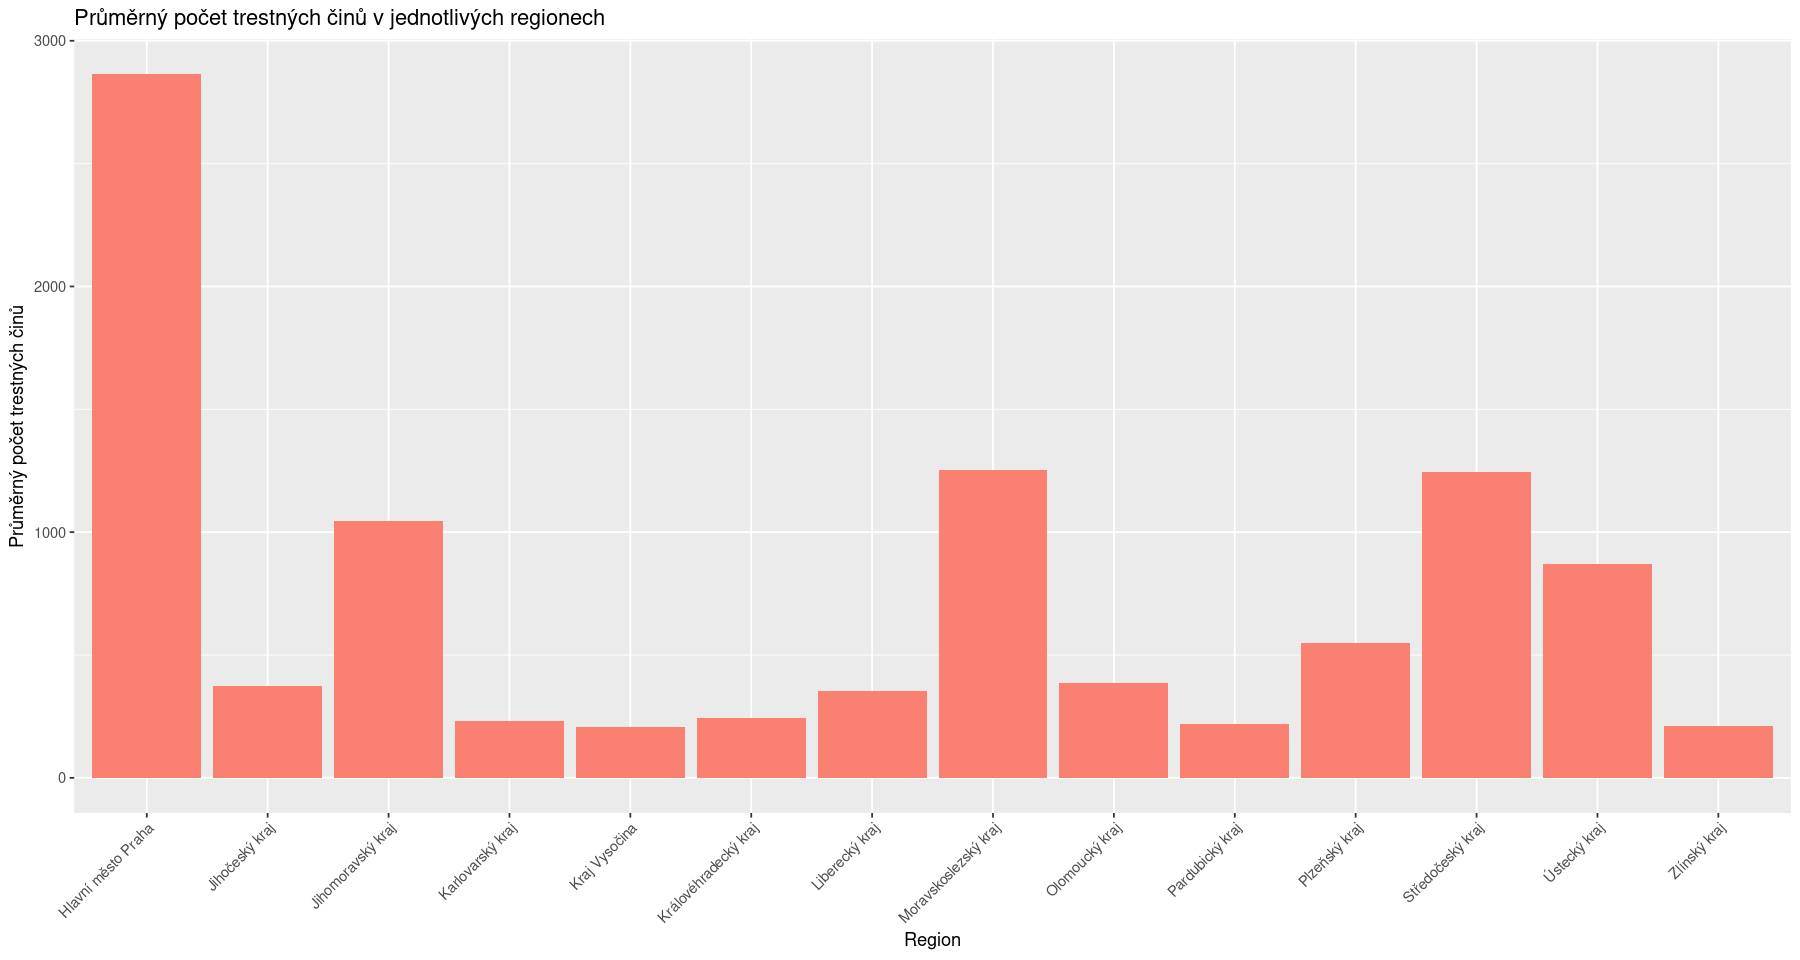

In [62]:
ggplot(czech_data, aes(x = geo, y = values)) +
  geom_bar(stat = "summary", fun = "mean", fill = "salmon") +
  labs(title = "Průměrný počet trestných činů v jednotlivých regionech", 
       x = "Region", y = "Průměrný počet trestných činů") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


> Nejvyšší trestnou činnost jsme evidovali v Praze a v Moravskoslezském kraji [kriminalita-v-roce-2021](https://www.policie.cz/clanek/vyvoj-registrovane-kriminality-v-roce-2021.aspx)

> Majetková kriminalita je nejzastoupenější oblastí [kriminalita-v-roce-2021](https://www.policie.cz/clanek/vyvoj-registrovane-kriminality-v-roce-2021.aspx)

Z grafu můžeme vidět, že opravdu nejvyšší počet trestných činu je Praze a v Moravskoslezském kraji. A druhou část budeme moci ověřit z pie chartu. Avšak čísla uváděná na stránkách policie.cz jsou vyšší než ty, které máme v datasetu. Myslím si, že nejsou zaznamenány trestné činy spáchané v souvislosti s dopravními silničními nehodami, kterou by tvořili značnou část datasetu.

##### Rozložení jednotlivých trestných činů v datasetu
* Burglary(vloupání): je nejčastějším trestným činem. Toto číslo může indikovat nedostatečné zabezpečení domů, slabiny v policejním hlídání
* Theft (krádež) je druhým nejčastějším trestným činem, představujícím 37.8% všech případů. Zde může navíc být zkoumáno, pokud by bylo poskutnuto dostatek informaci, zda jsou určité lokality nebo období častěji postiženy krádežemi, a jaké faktory mohou přispívat k tomuto jevu.
* Theft of a motorized land vehicle (krádež motorových vozidel) s 3.1% představuje menší podíl, ale stále je to významná část trestné činnosti. Zde může být zkoumáno, zase pokud by bylo poskytnuto dostatek informaci, což v našem případě nemáme, jaké typy vozidel jsou častěji kradeny.



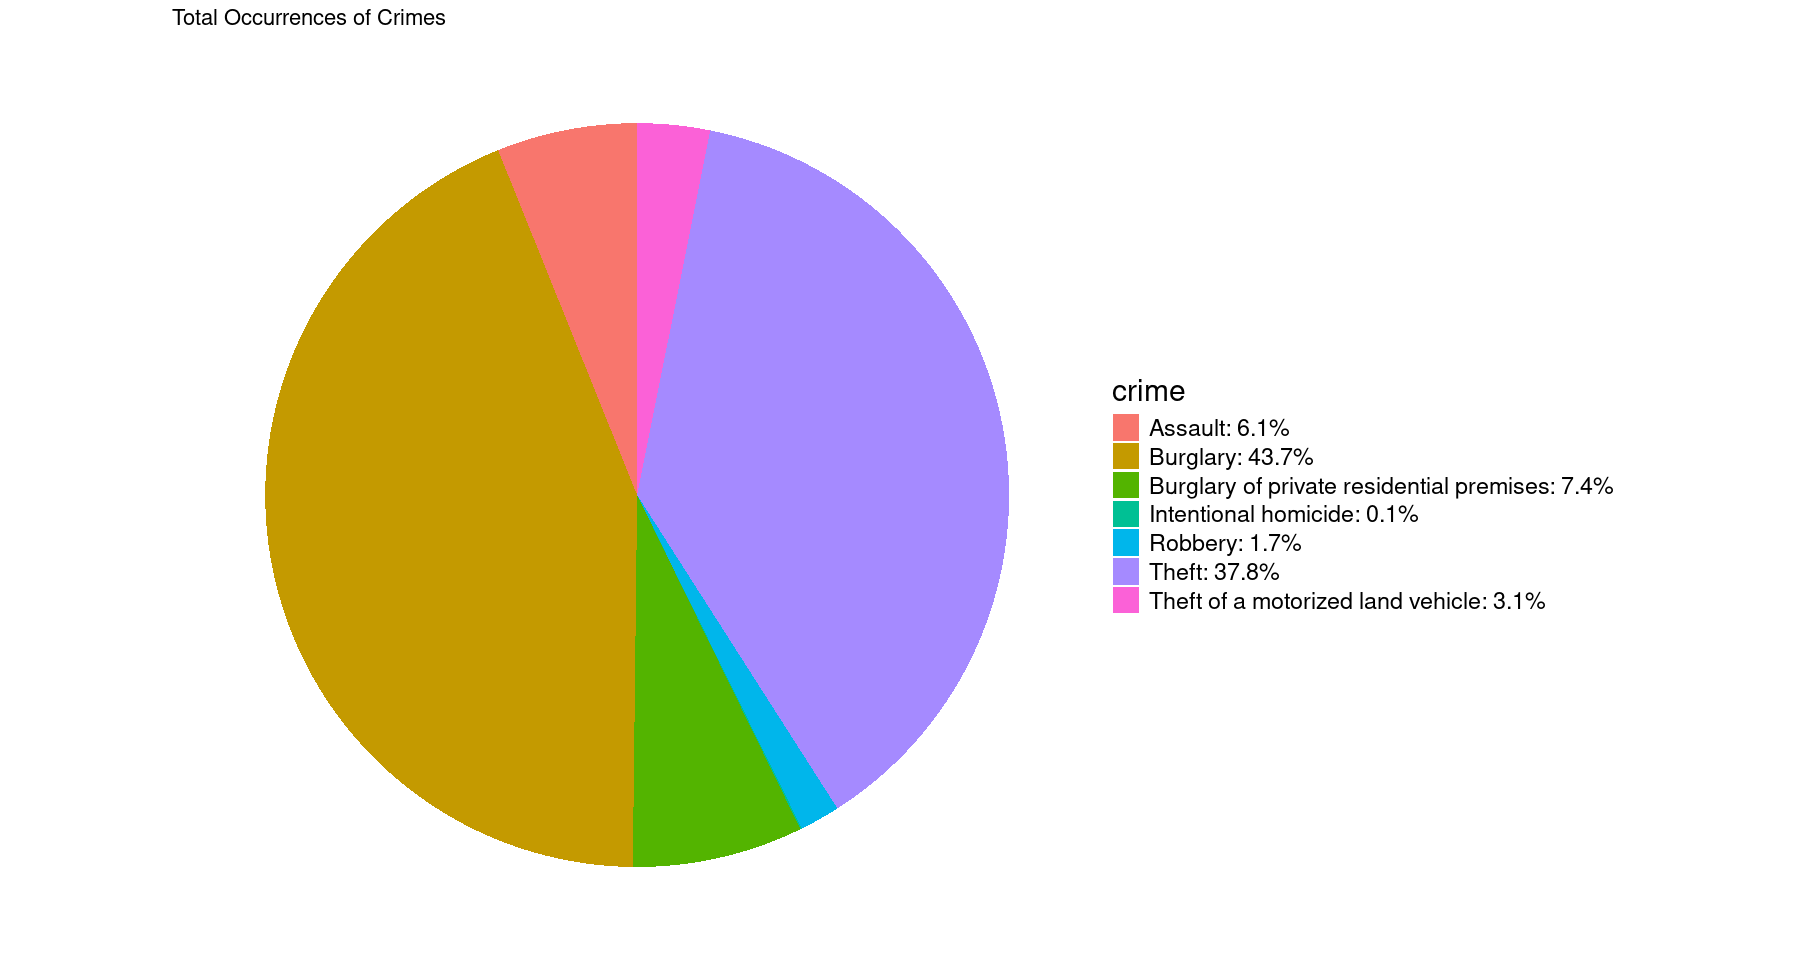

In [82]:
crime_sums <- tapply(czech_data$values, czech_data$iccs, sum)
crime_sums_df <- data.frame(crime = names(crime_sums),
                            count = crime_sums)
crime_sums_df$percent <- crime_sums_df$count / sum(crime_sums_df$count) * 100

pie_chart <- ggplot(crime_sums_df, aes(x = "", y = count, fill = crime)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(title = "Total Occurrences of Crimes") +
  theme_void() +
  theme(legend.position = "right", 
        legend.text = element_text(size = 14), 
        legend.title = element_text(size = 18)) + 
  scale_fill_discrete(labels = paste0(crime_sums_df$crime, ": ", round(crime_sums_df$percent, 1), "%"))

print(pie_chart)


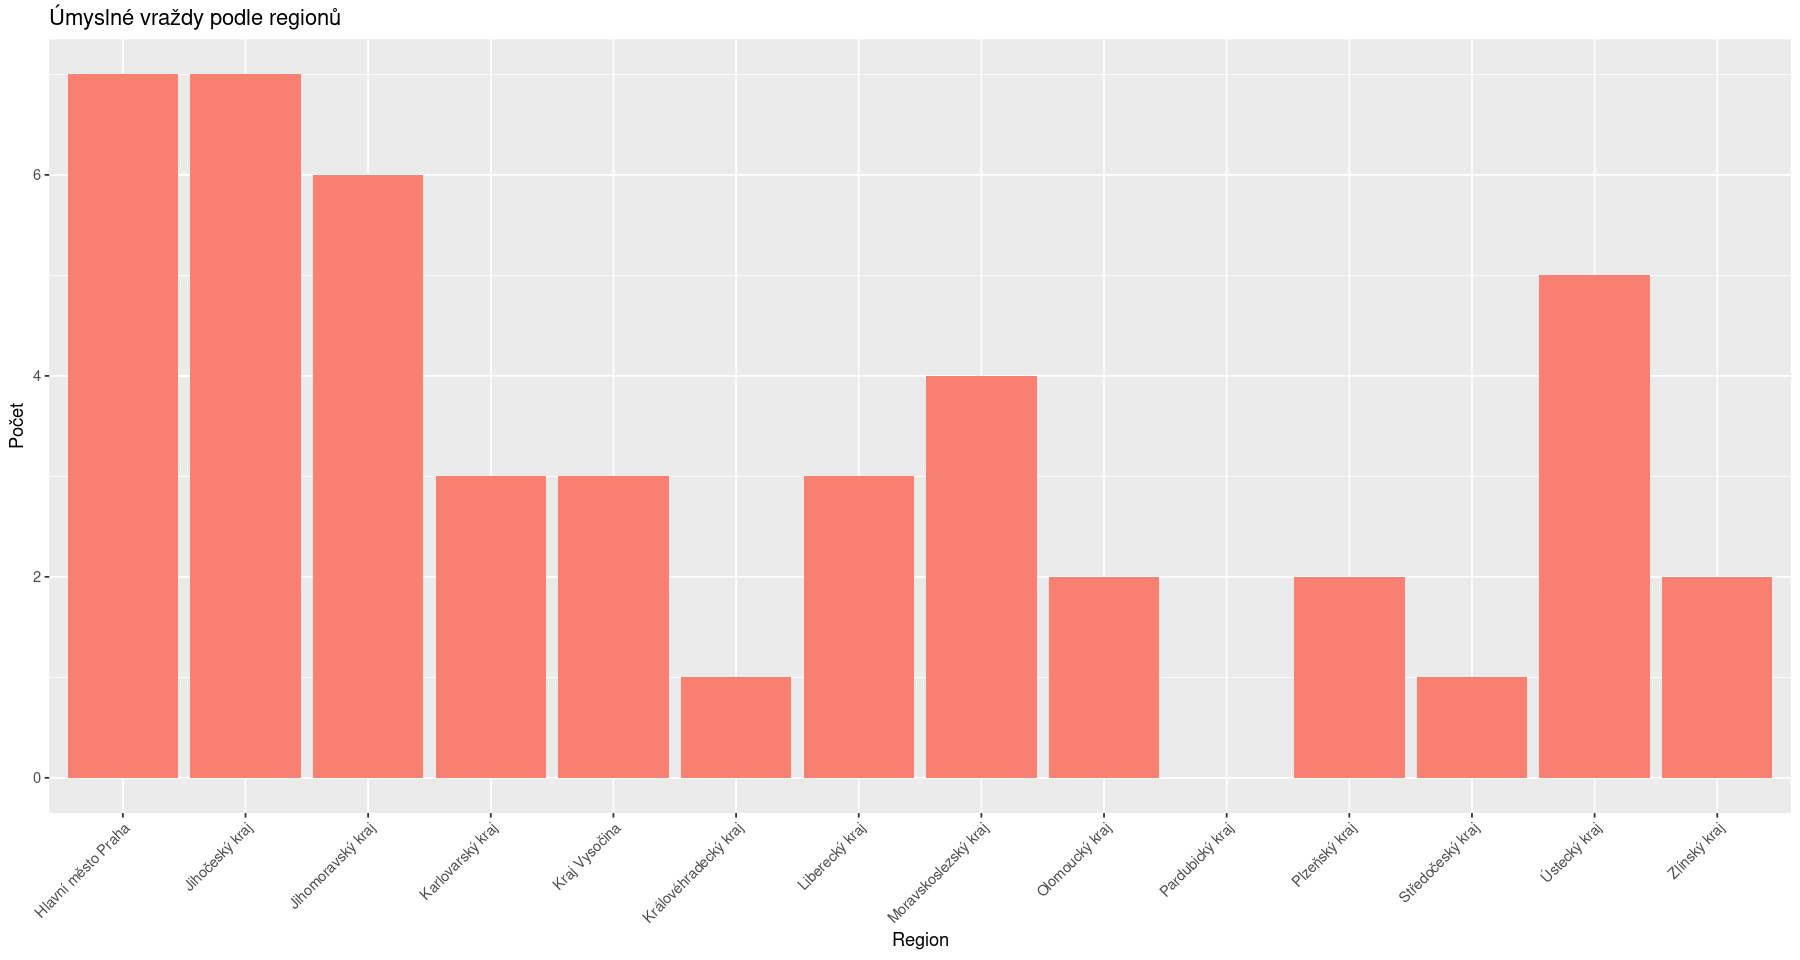

In [81]:
homicide_plot <- ggplot(czech_data[czech_data$iccs == "Intentional homicide", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Úmyslné vraždy podle regionů", x = "Region", y = "Počet") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
homicide_plot

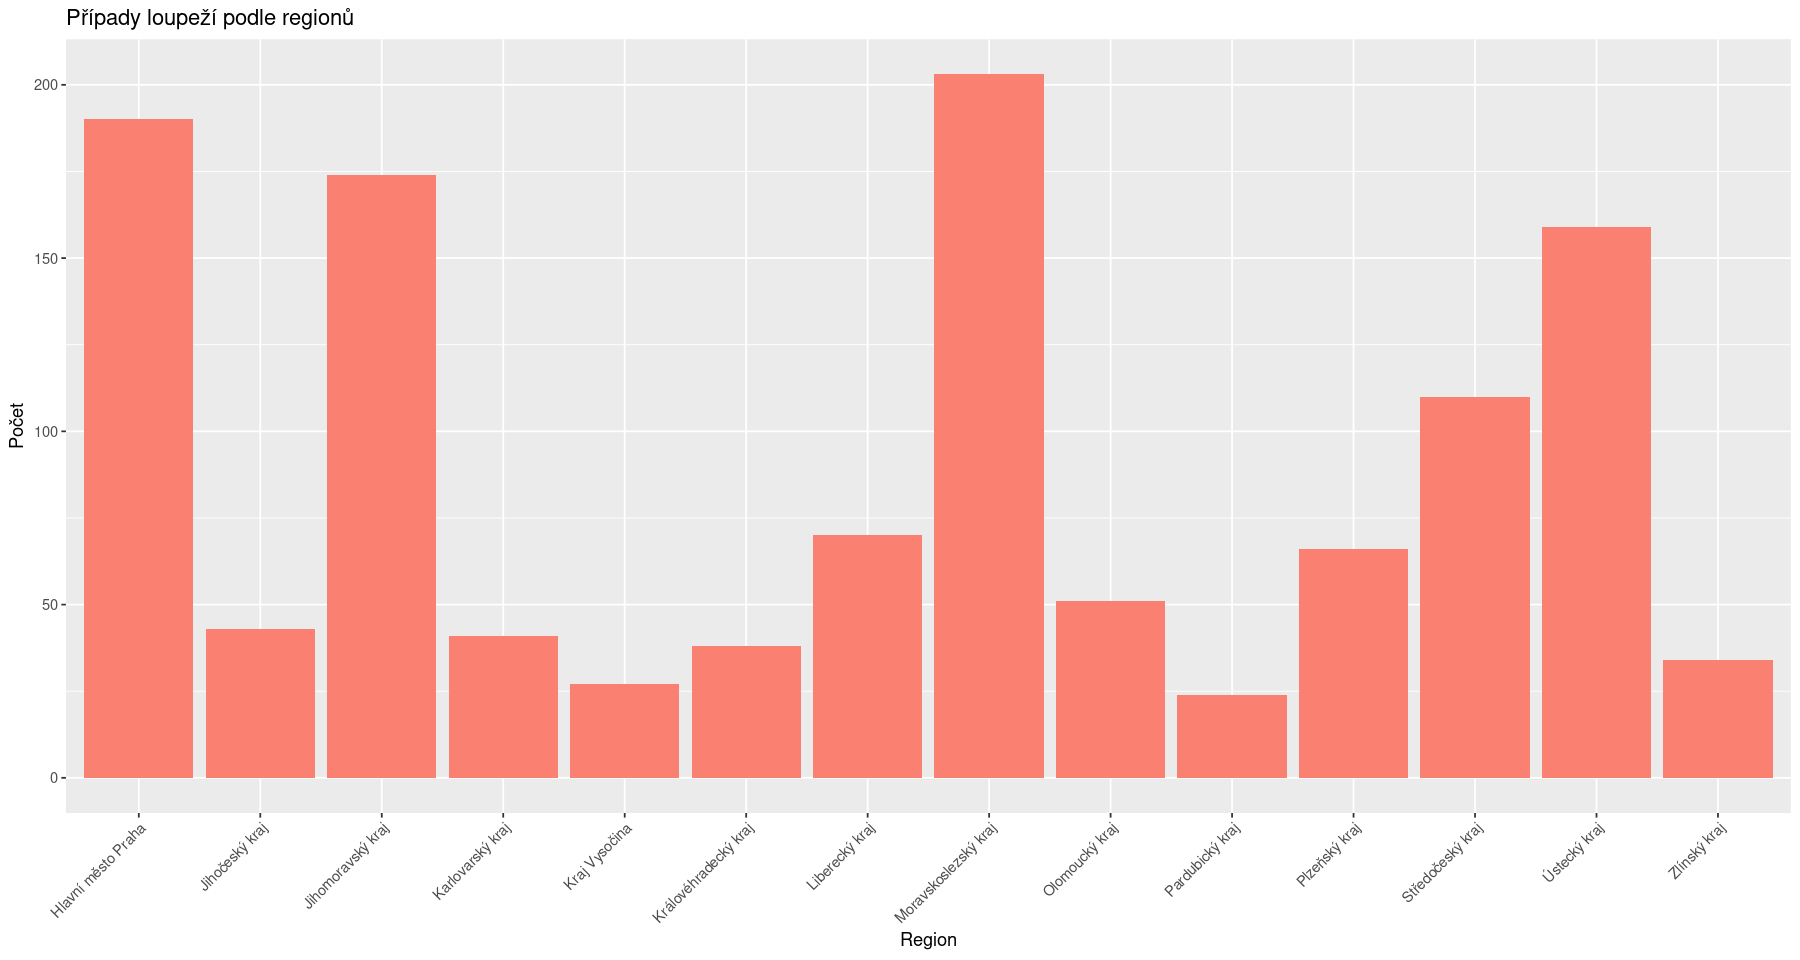

In [56]:
robbery_plot <- ggplot(czech_data[czech_data$iccs == "Robbery", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Případy loupeží podle regionů", x = "Region", y = "Počet") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
robbery_plot

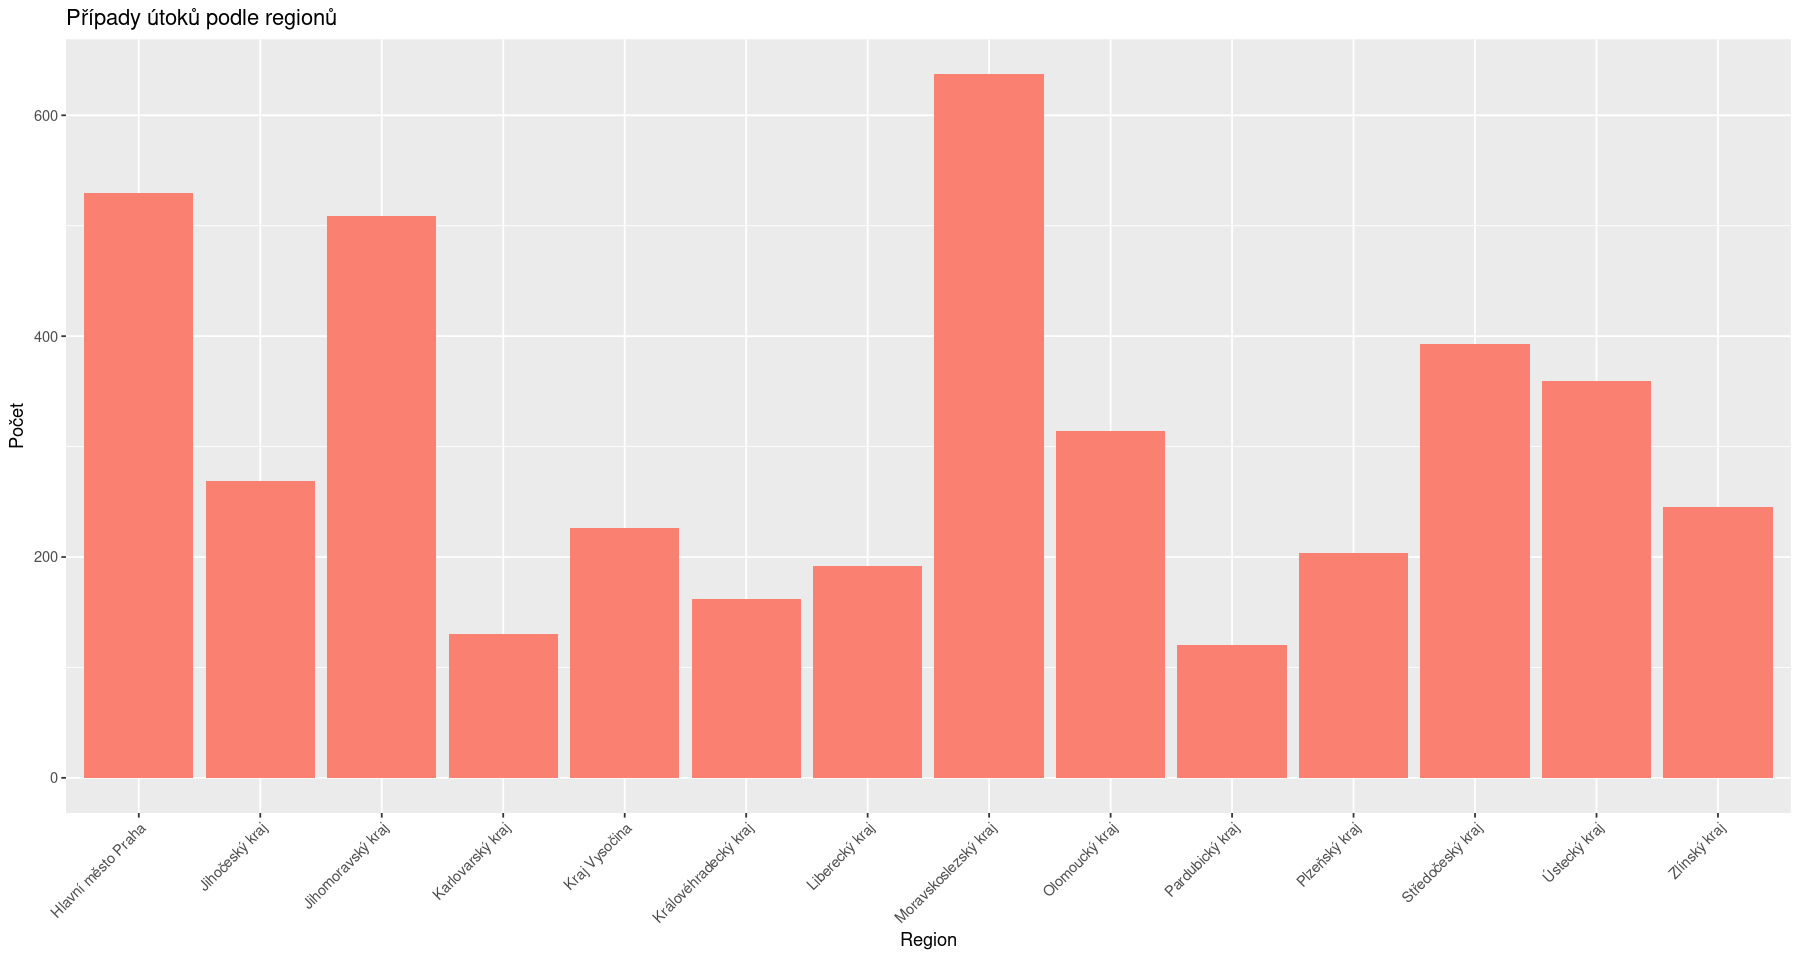

In [57]:
assault_plot <- ggplot(czech_data[czech_data$iccs == "Assault", ], aes(x = geo, y = values)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Případy útoků podle regionů", x = "Region", y = "Počet") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
assault_plot

## Kontingenční tabulka

Pro začátek zkrátíme názvy jedinečných hodnot atributu "iccs", aby byla tabulka přehlednější.

In [37]:
unique_values <- unique(czech_data$iccs)
unique_values

[1] "Intentional homicide"                     "Assault"                                 
[3] "Robbery"                                  "Burglary"                                
[5] "Burglary of private residential premises" "Theft"                                   
[7] "Theft of a motorized land vehicle"

In [38]:
# Přejmenování hodnot v atributu 'iccs'
czech_data$iccs <- recode(czech_data$iccs,
                           'Intentional homicide' = 'Homicide',
                           'Assault' = 'Asslt',
                           'Robbery' = 'Rbry',
                           'Burglary' = 'Brglry',
                           'Burglary of private residential premises' = 'Brglry Pvt Rsdnc',
                           'Theft' = 'Thft',
                           'Theft of a motorized land vehicle' = 'Vhcl Thft')

Nyní přímo sestavíme kontingenční tabulku, která bude obsahovat počty konkrétních trestných činů v určitých regionech České republiky.

In [39]:
options(width = 120)
kont_tab <- xtabs(formula=values ~ geo + iccs, data=czech_data)
print(kont_tab)

                      iccs
geo                    Asslt Brglry Brglry Pvt Rsdnc Homicide Rbry Thft Vhcl Thft
  Hlavní město Praha     530   9937             1105        7  190 7861       411
  Jihočeský kraj         269    931              206        7   43 1044       118
  Jihomoravský kraj      509   3296              462        6  174 2623       234
  Karlovarský kraj       130    599              149        3   41  633        54
  Kraj Vysočina          226    508              146        3   27  499        51
  Královéhradecký kraj   162    612              112        1   38  677        90
  Liberecký kraj         192    938              216        3   70  929       118
  Moravskoslezský kraj   637   3686              511        4  203 3497       226
  Olomoucký kraj         314    893              182        2   51 1188        86
  Pardubický kraj        120    587               95        0   24  644        59
  Plzeňský kraj          204   1775              359        2   66 1302

In [40]:
kont_tab <- as.table(kont_tab)
addmargins(kont_tab)

,Asslt,Brglry,Brglry Pvt Rsdnc,Homicide,Rbry,Thft,Vhcl Thft,Sum
Hlavní město Praha,530,9937,1105,7,190,7861,411,20041
Jihočeský kraj,269,931,206,7,43,1044,118,2618
Jihomoravský kraj,509,3296,462,6,174,2623,234,7304
Karlovarský kraj,130,599,149,3,41,633,54,1609
Kraj Vysočina,226,508,146,3,27,499,51,1460
Královéhradecký kraj,162,612,112,1,38,677,90,1692
Liberecký kraj,192,938,216,3,70,929,118,2466
Moravskoslezský kraj,637,3686,511,4,203,3497,226,8764
Olomoucký kraj,314,893,182,2,51,1188,86,2716
Pardubický kraj,120,587,95,0,24,644,59,1529


Z této tabulky lze pozorovat následující:
* **Hlavní město Praha**: V porovnání s ostatními regiony má největší počet trestných činů. Nejčastějšími trestnými činy jsou loupeže (9937) a vloupání do bytů (1105).
* **Kraj Vysočina**: Region s nejmenším celkovým počtem trestných činů (celkově 1460 trestných činů). To znamená, že Kraj Vysočina má nejmenší míru kriminality ve srovnání s ostatními regiony v České republice.
* **Rozdíly mezi regiony**: Tabulka ukazuje výrazné rozdíly v počtu trestných činů mezi jednotlivými regiony České republiky. Tento fakt naznačuje, že kriminalita není rovnoměrně rozložena po celém území, a může být ovlivněna mnoha faktory, jako jsou hustota obyvatelstva, sociální podmínky a ekonomický stav.
* **Dominantní typy trestných činů**: Z tabulky je zřejmé, že nejčastějšími trestnými činy jsou krádeže a loupeže, což je v souladu s obecnými trendy kriminality. Vraždy a vloupání do bytů jsou mnohem méně časté.
* **Středočeský kraj jako příkladní případ**: Středočeský kraj má vysoký počet trestných činů, což může být způsobeno jeho blízkostí k Hlavnímu městu Praze a vysokou hustotou obyvatelstva v této oblasti.

In [41]:
probs <- round(prop.table(kont_tab), digits = 4)
addmargins(probs)

,Asslt,Brglry,Brglry Pvt Rsdnc,Homicide,Rbry,Thft,Vhcl Thft,Sum
Hlavní město Praha,0.0075,0.1413,0.0157,1e-04,0.0027,0.1118,0.0058,0.2849
Jihočeský kraj,0.0038,0.0132,0.0029,1e-04,0.0006,0.0148,0.0017,0.0371
Jihomoravský kraj,0.0072,0.0469,0.0066,1e-04,0.0025,0.0373,0.0033,0.1039
Karlovarský kraj,0.0018,0.0085,0.0021,0e+00,0.0006,0.0090,0.0008,0.0228
Kraj Vysočina,0.0032,0.0072,0.0021,0e+00,0.0004,0.0071,0.0007,0.0207
Královéhradecký kraj,0.0023,0.0087,0.0016,0e+00,0.0005,0.0096,0.0013,0.0240
Liberecký kraj,0.0027,0.0133,0.0031,0e+00,0.0010,0.0132,0.0017,0.0350
Moravskoslezský kraj,0.0091,0.0524,0.0073,1e-04,0.0029,0.0497,0.0032,0.1247
Olomoucký kraj,0.0045,0.0127,0.0026,0e+00,0.0007,0.0169,0.0012,0.0386
Pardubický kraj,0.0017,0.0083,0.0014,0e+00,0.0003,0.0092,0.0008,0.0217


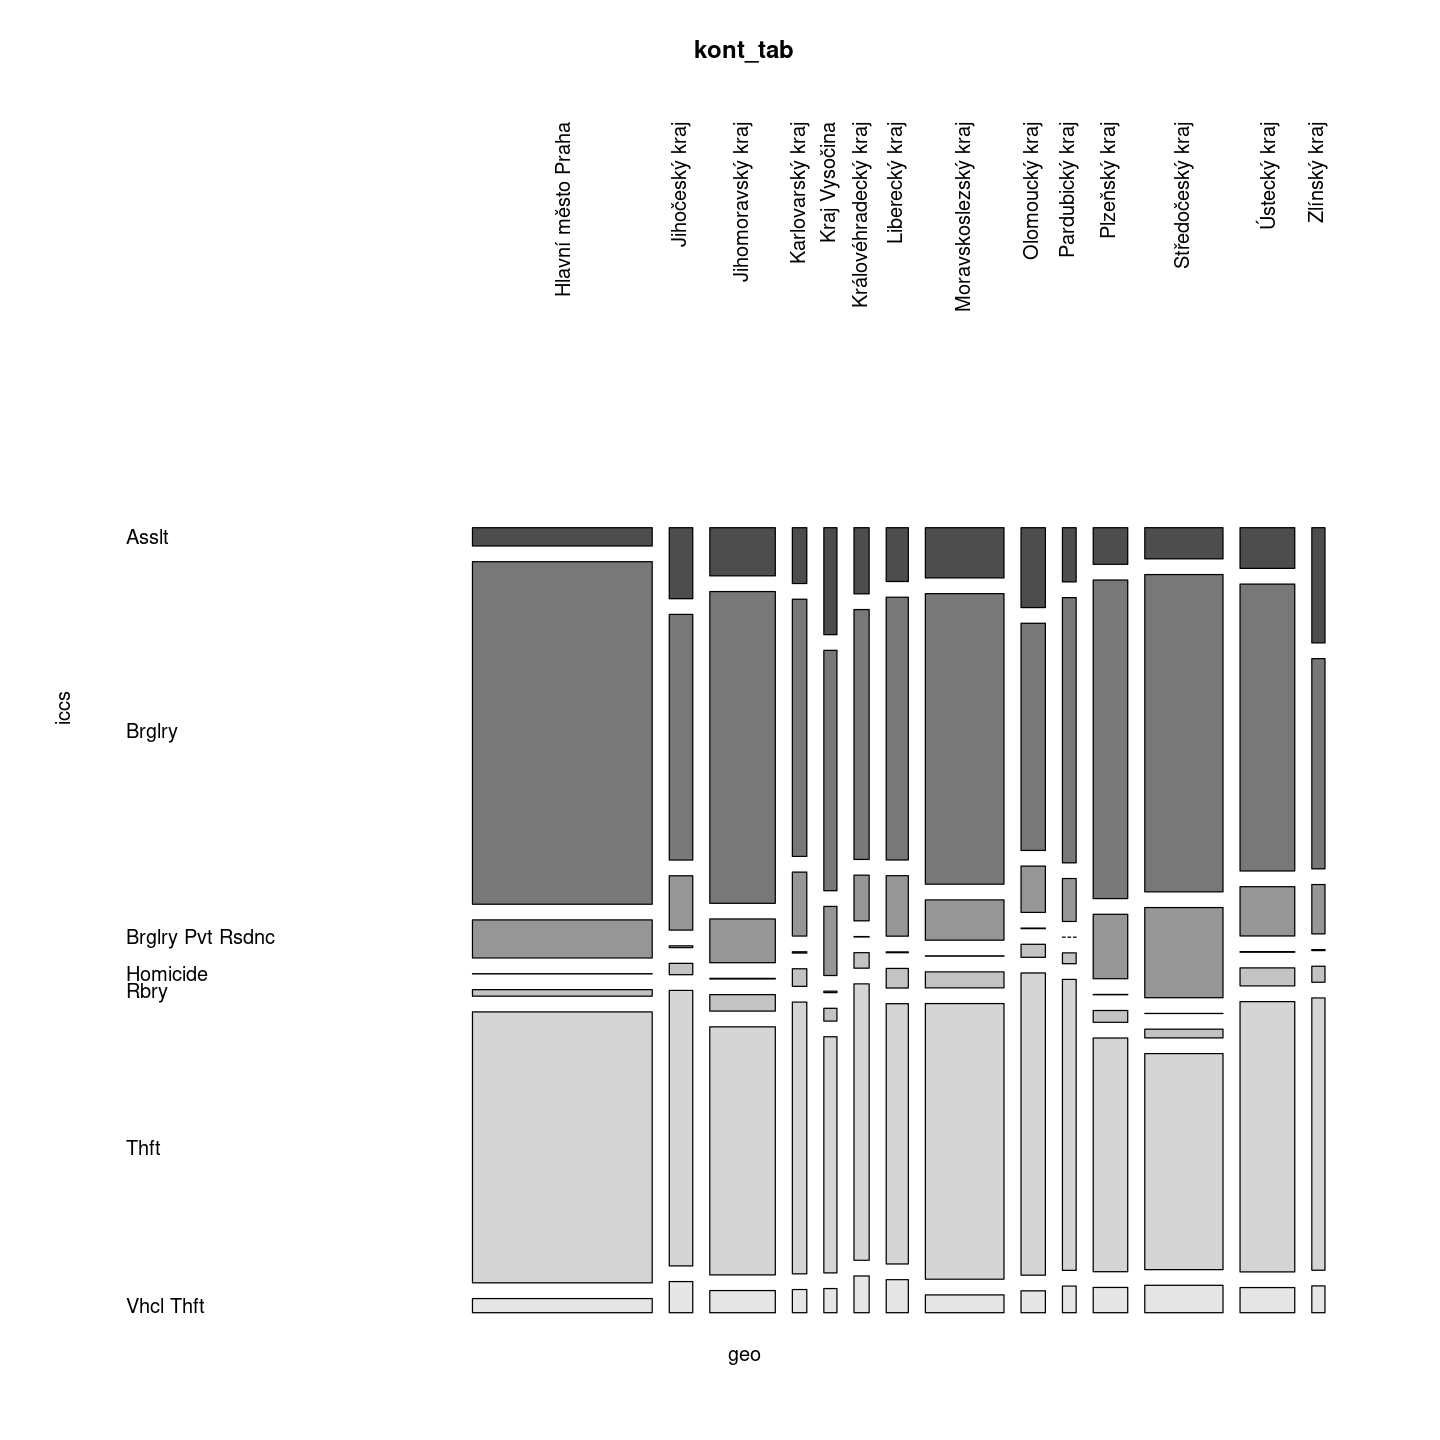

In [42]:
options(repr.plot.width = 12, repr.plot.height = 12)
mosaicplot(kont_tab, color = TRUE, las = 1.5, cex.axis = 1)

* Při pohledu na mozaikový plot by se mohlo zdát, že rozdělení trestných činů v různých regionech je podobné nebo dokonce stejné.
* Na první pohled můžeme vidět, že některé oblasti mají podobně velké dlaždice pro určité trestné činy, což by mohlo naznačovat, že se rozložení trestných činů mezi regiony příliš neliší.
* Pro potvrzení skutečného rozdělení trestných činů mezi regiony bychom měli provést další analýzy.
* Proto provedeme test homogenity rozdělení:
    - $H_0$: Rozdělení trestných činů v jednotlivých regionech České republiky je homogenní, což znamená, že pravděpodobnosti výskytu jednotlivých trestných činů jsou pro všechny regiony stejné
    - $H_A$: neplatí $H_0$

Ověření těchto hypotéz by bylo možné pomocí Pearsonova testu $\chi^2$, ale údajně však výsledky testu nemusí být zcela relevantní a správné. Nakonec nám to říká i varování po pokusu o použití tohoto testu. Ale i tak zvědavost zvítězí a podíváme se na výsledek Pearsonova testu.

In [43]:
pearson <- chisq.test(kont_tab)
pearson

Warning message in chisq.test(kont_tab):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  kont_tab
X-squared = 2808.3, df = 78, p-value < 2.2e-16


Tento výsledek indikuje, že existuje statisticky významný vztah mezi trestnými činy a regiony. P-value je mimořádně malé, což znamená, že máme silné důkazy proti nulové hypotéze a lze ji zamítnout. Podle toho testu to znamená, že rozložení trestných činů není homogenní mezi regiony České republiky.

In [44]:
addmargins(pearson$observed)

,Asslt,Brglry,Brglry Pvt Rsdnc,Homicide,Rbry,Thft,Vhcl Thft,Sum
Hlavní město Praha,530,9937,1105,7,190,7861,411,20041
Jihočeský kraj,269,931,206,7,43,1044,118,2618
Jihomoravský kraj,509,3296,462,6,174,2623,234,7304
Karlovarský kraj,130,599,149,3,41,633,54,1609
Kraj Vysočina,226,508,146,3,27,499,51,1460
Královéhradecký kraj,162,612,112,1,38,677,90,1692
Liberecký kraj,192,938,216,3,70,929,118,2466
Moravskoslezský kraj,637,3686,511,4,203,3497,226,8764
Olomoucký kraj,314,893,182,2,51,1188,86,2716
Pardubický kraj,120,587,95,0,24,644,59,1529


In [45]:
addmargins(round(pearson$expected, digits = 2))

,Asslt,Brglry,Brglry Pvt Rsdnc,Homicide,Rbry,Thft,Vhcl Thft,Sum
Hlavní město Praha,1222.34,8760.97,1487.61,13.11,350.46,7575.96,630.55,20041.00
Jihočeský kraj,159.68,1144.47,194.33,1.71,45.78,989.66,82.37,2618.00
Jihomoravský kraj,445.49,3192.96,542.16,4.78,127.73,2761.08,229.80,7304.00
Karlovarský kraj,98.14,703.38,119.43,1.05,28.14,608.24,50.62,1609.00
Kraj Vysočina,89.05,638.24,108.37,0.95,25.53,551.91,45.94,1459.99
Královéhradecký kraj,103.20,739.66,125.59,1.11,29.59,639.61,53.24,1692.00
Liberecký kraj,150.41,1078.02,183.05,1.61,43.12,932.20,77.59,2466.00
Moravskoslezský kraj,534.53,3831.21,650.54,5.73,153.26,3312.99,275.74,8764.00
Olomoucký kraj,165.65,1187.31,201.60,1.78,47.50,1026.71,85.45,2716.00
Pardubický kraj,93.26,668.41,113.50,1.00,26.74,578.00,48.11,1529.02


V "ideálním případě", kdyby rozdělení trestných činů bylo homogenní, očekávali bychom podobné počty trestných činů v jednotlivých regionech. Avšak skutečné hodnoty se významně liší od těchto očekávaných hodnot. Tento významný rozdíl naznačuje, že existují systematické variace v distribuci trestných činů mezi regiony, což jednoznačně potvrzuje nehomogenitu rozdělení. Je však třeba vzít v úvahu i skutečnost, že očekávané hodnoty například vražd se v některých regionech pohybují kolem nuly. Tato skutečnost nepochybně potěšující, nicméně konkrétně pro Pearsonův test to může být problém. 

Proto pro větší jistotu v předchozích závěrech provedeme i Fischerův test:
* $H_0$: Rozdělení trestných činů mezi regiony České republiky je náhodné, tj. není žádný vztah mezi trestnými činy a regiony
* $H_A$: neplatí $H_0$

In [46]:
fisher.test(kont_tab, simulate.p.value=T)


	Fisher's Exact Test for Count Data with simulated p-value (based on 2000 replicates)

data:  kont_tab
p-value = 0.0004998
alternative hypothesis: two.sided


* P-hodnota, která je 0.0004998, je mimořádně nízká, což naznačuje, že máme silné důkazy proti nulové hypotéze. To znamená, že rozdělení trestných činů mezi regiony není náhodné a existuje statisticky významný vztah mezi trestnými činy a regiony.
* Celkově vzato, výsledek Fischerova testu podporuje naši hypotézu o nehomogenitě rozdělení trestných činů mezi regiony.